<a href="https://colab.research.google.com/github/Knell999/ML_Ops_HK-Toss/blob/main/Chapter_1_%EA%B8%B0%EC%B4%88/02_%EC%8B%9C%EA%B0%81%ED%99%94/03_seaborn_%EA%B8%B0%EB%B0%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 0. Seaborn 개요
* matplotlib보다 많이 쓰는 이유는 **통계 기반 plot**을 손쉽게 그릴 수 있기 때문
* matplotlib으로 집계된 데이터 (통계 기반 데이터)를 시각화를 하고 싶다면?
  * groupby 또는 pivot_table을 만들어서 시각화를 해야합니다.
  * 카테고리별 분류를 하기 위해서는 plot을 각각 그려야 한다.
* **실무에서는**
  * 단순하게 임의의 데이터만을 시각화해서 빠르게 보고 싶을 때 : matplotlib, seaborn
    * 통계적인 시각화가 필요 없을 때
  * 데이터 프레임 기반의 통계를 사용한 시각화를 해보고 싶을 때는 seaborn


## 0-1. Seaborn에서만 제공되는 통계기반 plot

In [ ]:
# seaborn에서 기본적으로 제공하는 샘플 데이터 세트 가져오기
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**tips : 식당 데이터셋**
* `total_bill` : 지불 금액
* `tip` : 팁
* `sex` : 성별 ( 남자가 지불했는지, 여자가 지불했는지 )
* `smoker` : 지불한 사람이 흡연자인지, 비흡연자인지
* `day` : 요일
* `time` : 식사 때( 점심, 저녁 )
* `size` : 몇명이서 식사를 했는지


In [ ]:
# 요일 별 식사한 테이블의 개수를 시각화
#   - 일요일에는 몇 테이블이 식사했고, 월요일에는 몇 테이블이 식사했고
df_by_day_count = tips.groupby("day")["total_bill"].count()
df_by_day_count

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: total_bill, dtype: int64

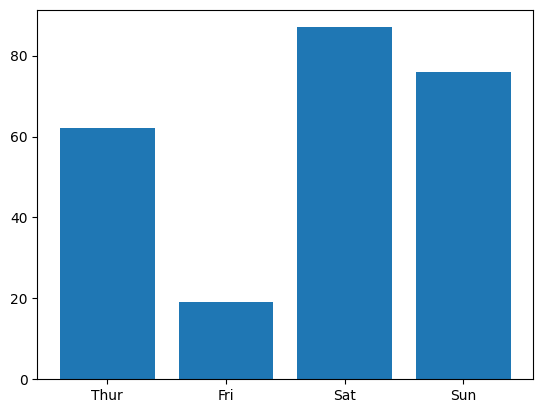

In [ ]:
plt.bar(df_by_day_count.index, df_by_day_count)
plt.show()

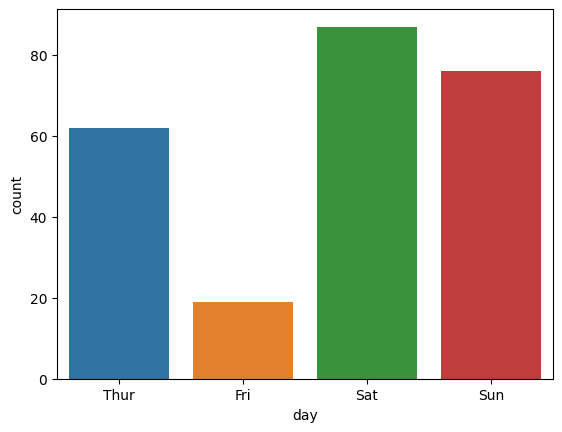

In [ ]:
# seaborn을 활용하면??
sns.countplot(data=tips, x='day')
plt.show()

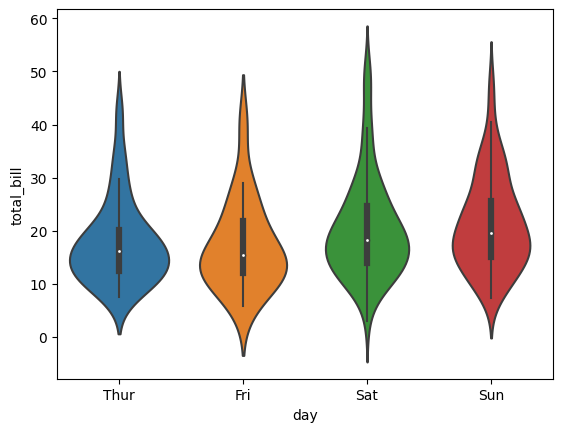

In [ ]:
# 요일 별 total_bill의 빈도수 - 바이올린 플롯
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

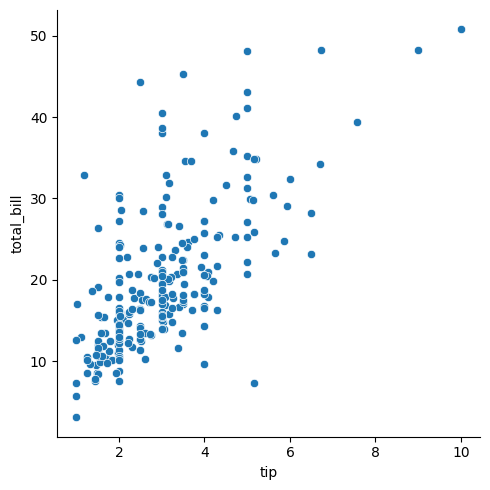

In [ ]:
sns.relplot(x='tip', y='total_bill', data=tips)
plt.show()

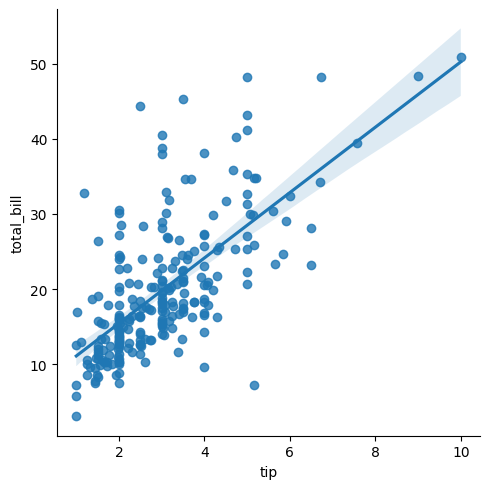

In [ ]:
# 회귀선 그리기
sns.lmplot(x='tip', y='total_bill', data=tips)
plt.show()

<ipython-input-11-3ed23ca748bf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr(), annot=True, linewidths=1)


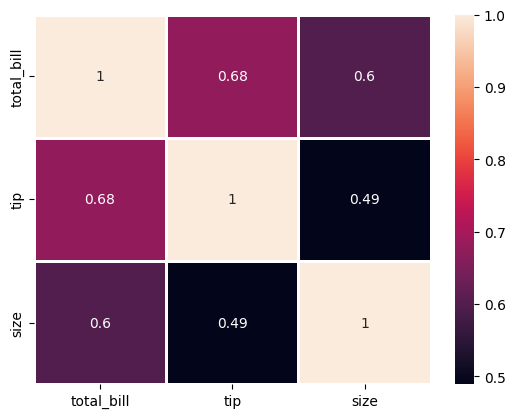

In [ ]:
sns.heatmap(tips.corr(), annot=True, linewidths=1)
plt.show()

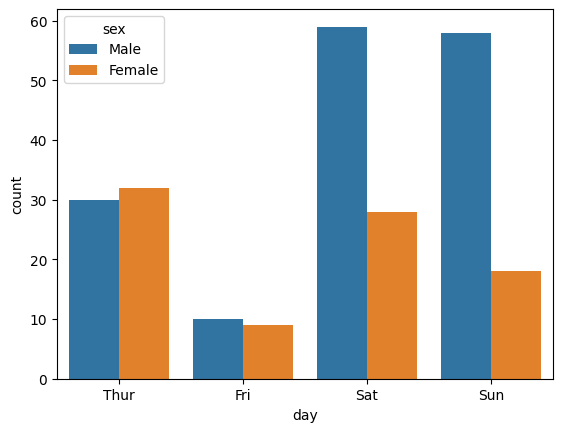

In [ ]:
# 카테고리별로 따로 그려주기 - hue
sns.countplot(x='day', data=tips, hue='sex')
plt.show()

## 0-2. 다양하고 아름다운 스타일링

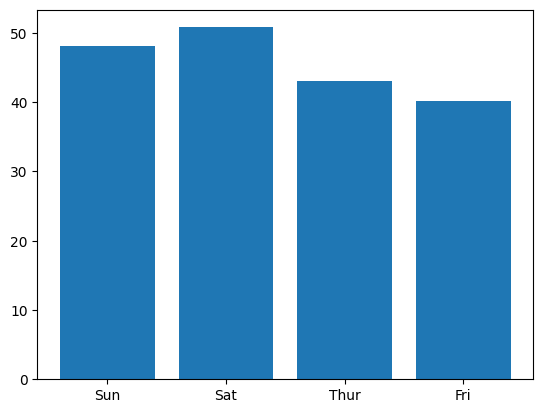

In [ ]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

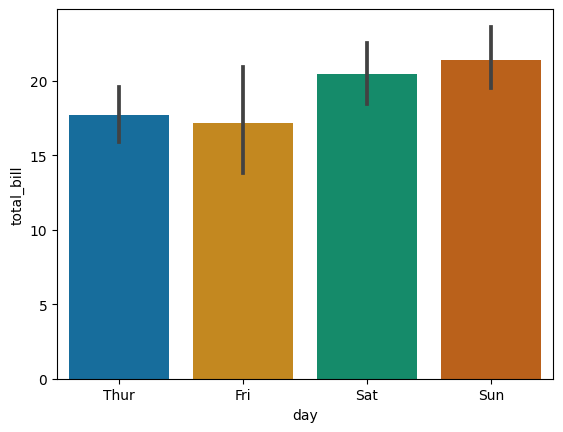

In [ ]:
sns.barplot(x='day', y='total_bill', data=tips, palette='colorblind')
plt.show()

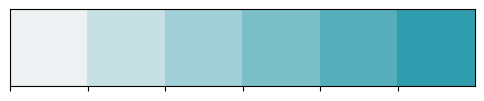

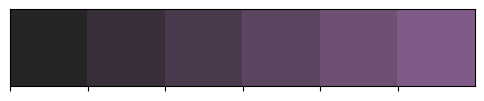

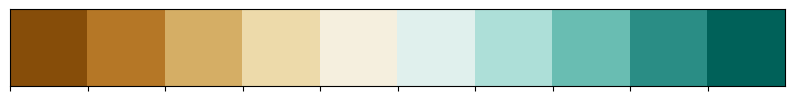

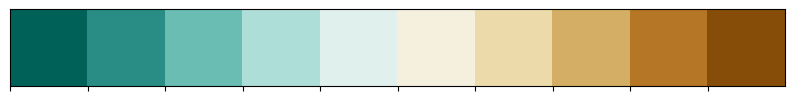

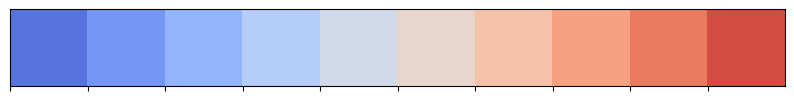

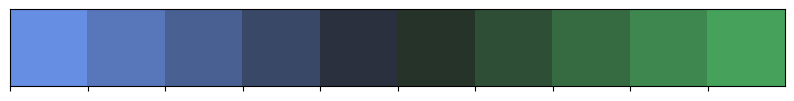

In [ ]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

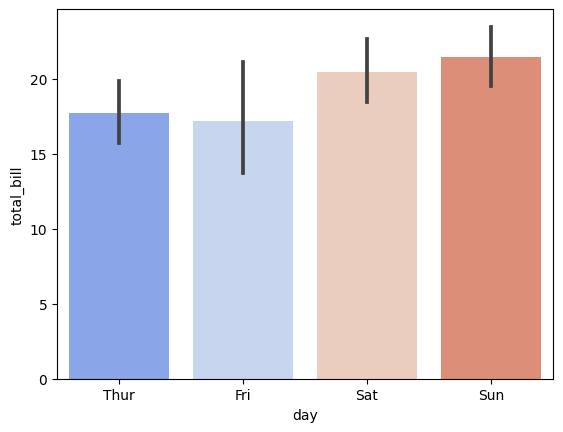

In [ ]:
sns.barplot(x='day', y='total_bill', data=tips, palette="coolwarm")
plt.show()

실습용 데이터셋
* `titanic` : 타이타닉 사망자 / 생존자 데이터셋
* `tips` : 식당 데이터셋

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**타이타닉 데이터셋 설명**
* survived: 생존여부
* pclass: 좌석등급
* sex: 성별
* age: 나이
* sibsp: 형제자매 + 배우자 숫자
* parch: 부모자식 숫자
* fare: 요금
* embarked: 탑승 항구
* class: 좌석등급 (영문)
* who: 사람 구분
* deck: 데크
* embark_town: 탑승 항구 (영문)
* alive: 생존여부 (영문)
* alone: 혼자인지 여부

# 1. Countplot
* 항목별 개수를 세어주는 시각화 방법
* 알아서 컬럼을 구성하고 있는 value들을 구분해서 보여줍니다.

In [ ]:
sns.set(style='darkgrid')

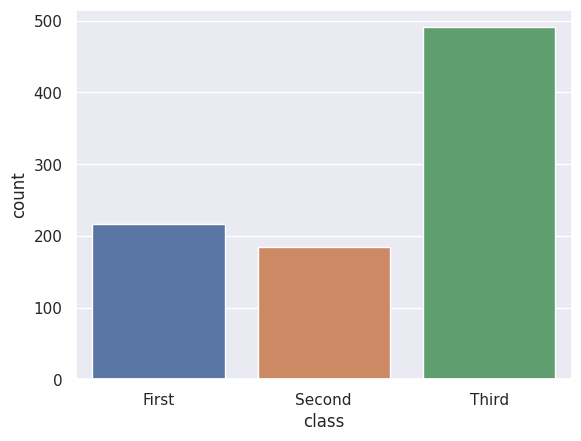

In [ ]:
sns.countplot(x='class', data=titanic) # titanic 데이터세트에서 class(좌석 등급)마다의 개수를 시각화
plt.show()

`hue` 옵션을 활용해서 원하는 카테고리별 비교 시각화 가능

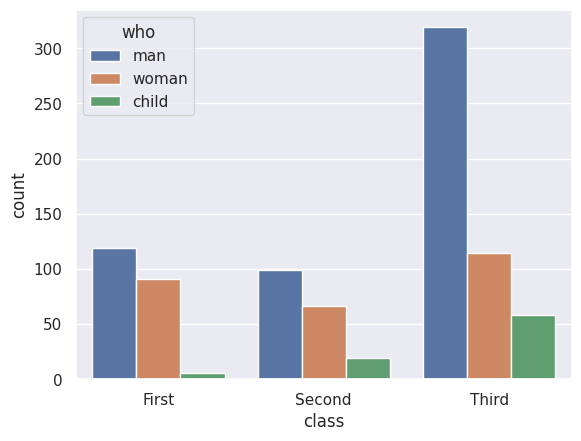

In [ ]:
sns.countplot(x='class', data=titanic, hue='who')
plt.show()

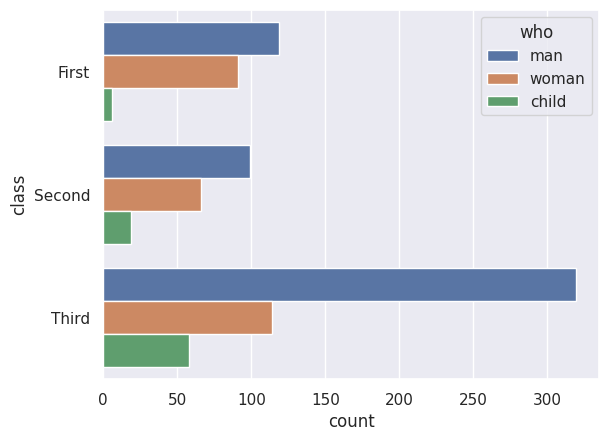

In [ ]:
sns.countplot(y='class', hue='who', data=titanic)
plt.show()

# 2. displot
- 히스토그램을 그리기 위한 plot


In [ ]:
N = 100000

x = np.random.randn(N)

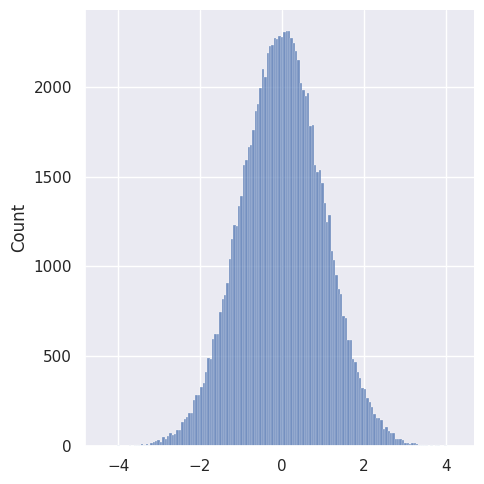

In [ ]:
sns.displot(x)
plt.show()

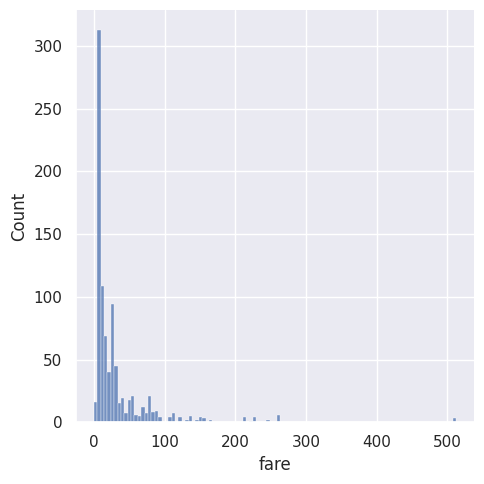

In [ ]:
sns.displot(titanic['fare'])
plt.show()

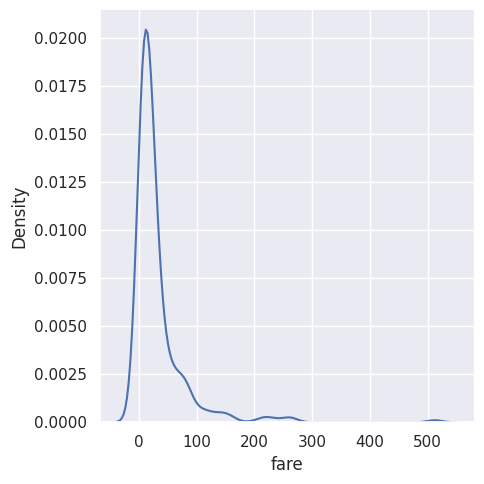

In [ ]:
# kde 그리기
sns.displot(data=titanic, x='fare', kind='kde')

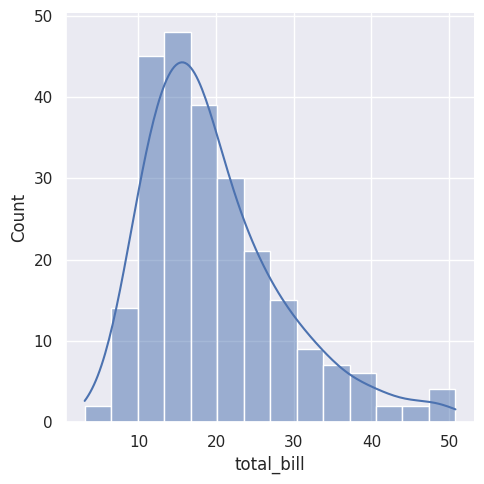

In [ ]:
# 히스토그램 + KDE를 동시에 표현
sns.displot(x='total_bill', data=tips, kde=True)
plt.show()

`rug`는 `rugplot`이라고도 불리며, 데이터의 위치를 x축 위에 **작은 선분(rug)으로 나타내어서, 데이터의 위치와 분포를 보여준다.**

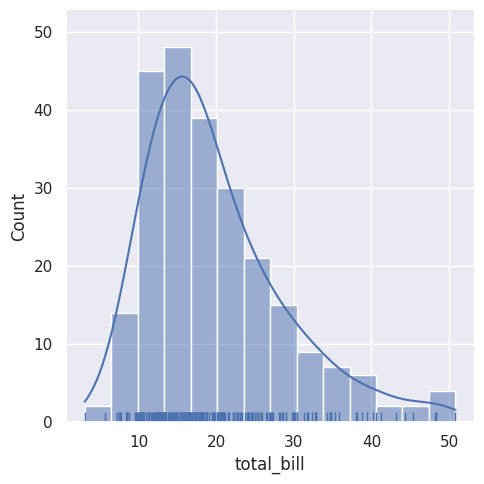

In [ ]:
sns.displot(x='total_bill', data=tips, kde=True, rug=True)
plt.show()

# 3. heatmap
데이터의 크기를 색상의 농도로 표현한다.

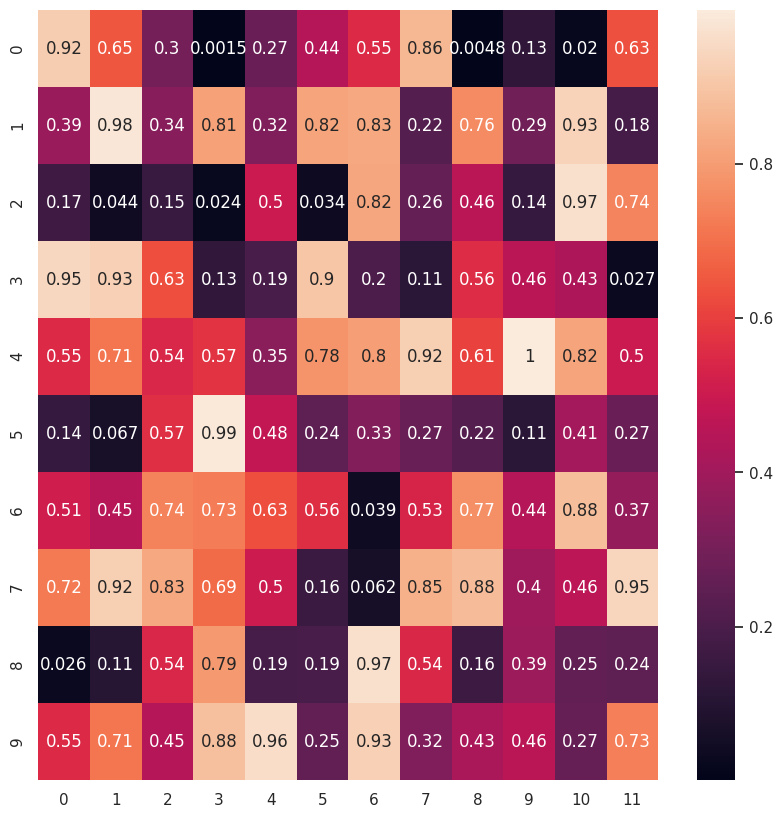

In [ ]:
plt.figure(figsize=(10, 10))
x = np.random.rand(10, 12)
sns.heatmap(x, annot=True) # annot : 히트맵 내부에 숫자로 값을 표시
plt.show()

In [ ]:
# 요일 별 방문 인원의 팁의 평균
pivot = tips.pivot_table(
    index='day',
    columns='size',
    values='tip'
)
pivot

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


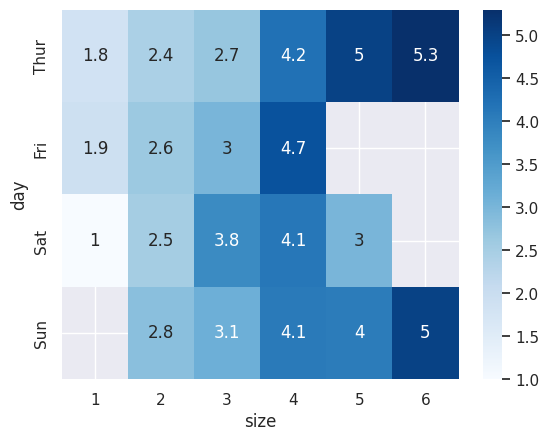

In [ ]:
sns.heatmap(pivot, cmap='Blues', annot=True)
plt.show()

# 4. pairplot
* pairplot은 그리드 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그린다.
  * 집합(데이터)의 조합
    - `tips` & `total_bill`의 조합
    - `size` & `total_bill`의 조합
    - `tips` & `size`의 조합
* 숫자형 column에 대해서만 그려준다.

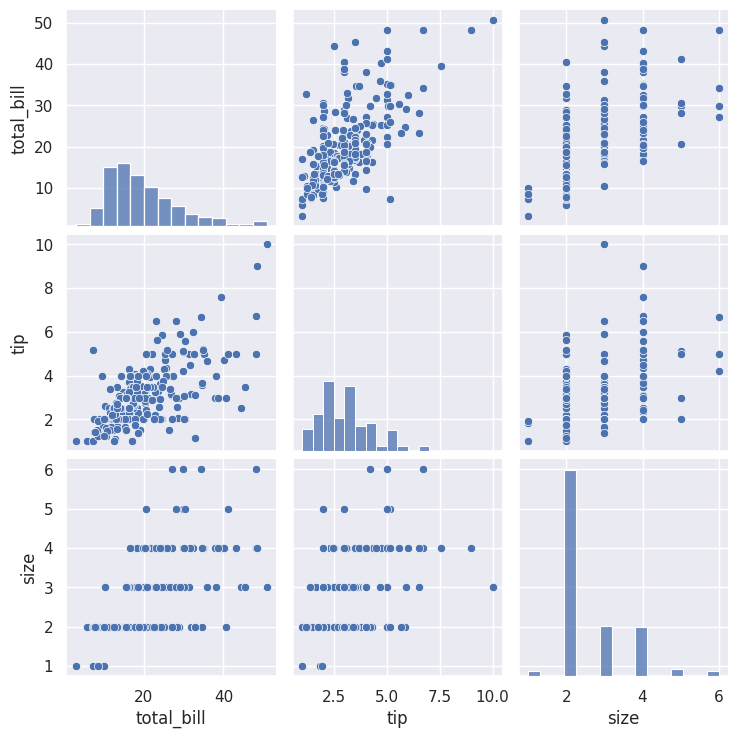

In [ ]:
sns.pairplot(tips)
plt.show()

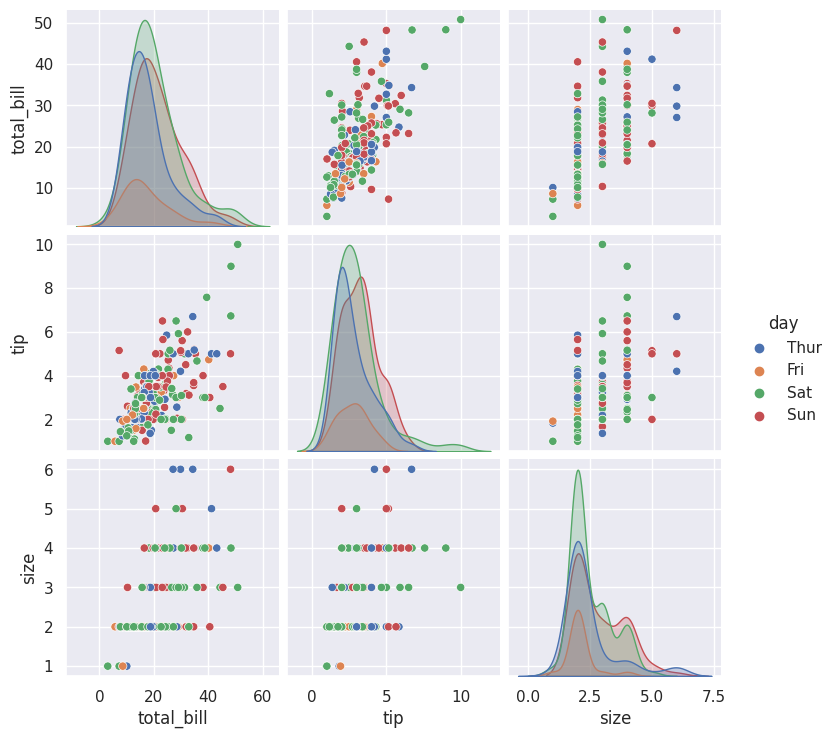

In [ ]:
# hue를 사용해도 된다.
sns.pairplot(tips, hue='day')
plt.show()

# 5. violinplot
* column에 대한 데이터의 **비교 분포도**를 확인
  * kde와 거의 비슷하지만 그래프가 대칭으로 되어있다.
  * kde는 density(밀집도), violinplot은 실제 값의 빈도
* 곡선으로 되어있는 뚱뚱한 부분은 데이터의 분포
* 양쪽 끝 뾰족한 부분은 데이터의 최소와 최대를 나타냅니다.

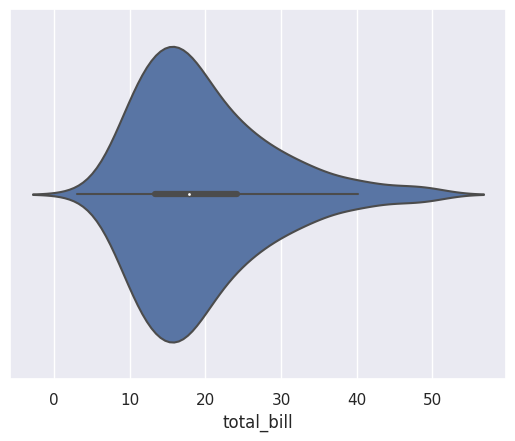

In [ ]:
sns.violinplot(x='total_bill', data=tips)
plt.show()

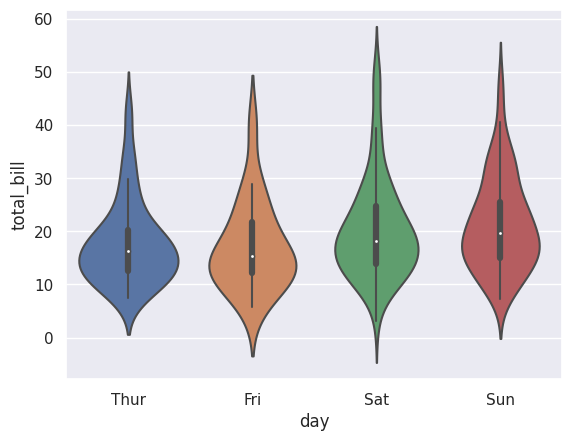

In [ ]:
# 요일 별 지불 가격의 비교 분포 확인
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

* hue 옵션을 사용하지 않으면 바이올린이 대칭이기 때문에 KDE로 보는 것과 큰 차이가 없다.
* hue 옵션을 부여하면 **단일 컬럼에 대한 바이올린 모양의 비교**를 할 수 있다.  

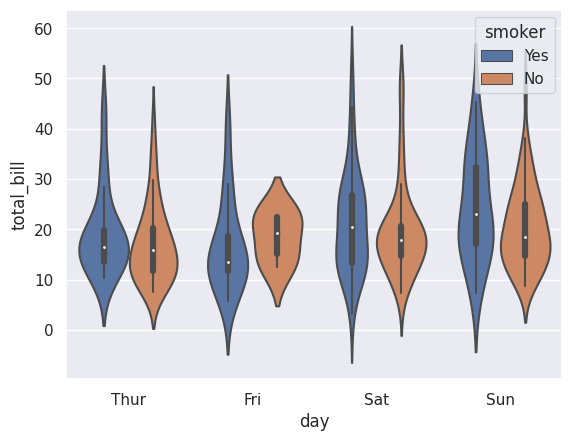

In [ ]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker')
plt.show()

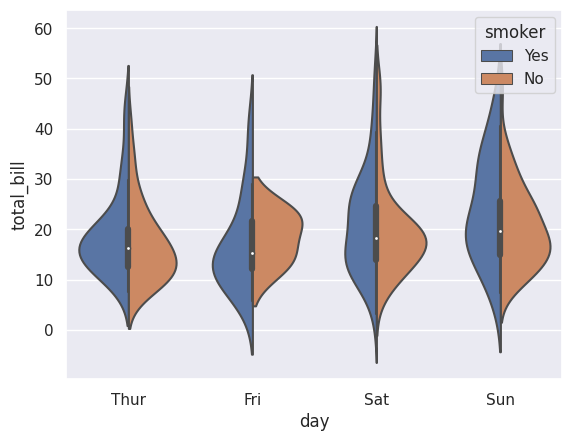

In [ ]:
# hue 옵션으로 분할된 바이올린 플롯을 각각 합치고 싶으시면 split=True를 주면 된다.
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', split=True)
plt.show()

In [ ]:
# hue의 구분 값이 3개 이상이면 split 사용 불가
sns.violinplot(x='class', y='fare', data=titanic, hue='who', split=True) # who의 hue는 3개이기 때문에 split 사용 불가
plt.show()

ValueError: ignored

# 6. lmplot
lmplot은 컬럼간의 **선형관계를 확인하기에 용이하다.**
* outlier도 같이 짐작이 가능! - 하지만 boxplot을 사용하시는게 더 좋아요.

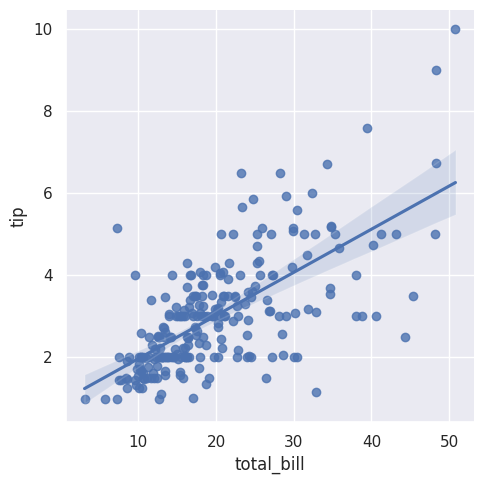

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

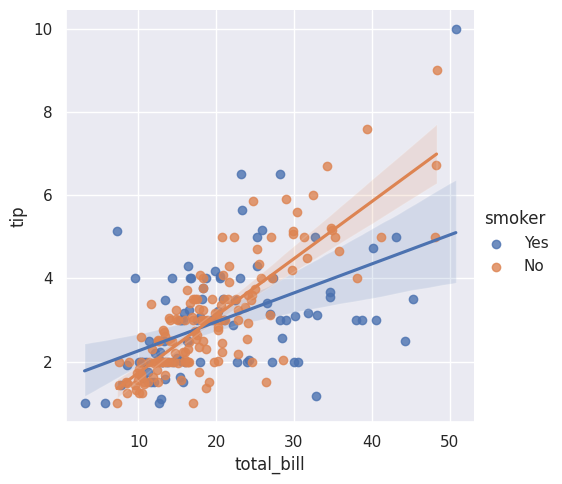

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)
plt.show()

# 7. relplot
두 컬럼간의 상관관계를 보지만 lmplot 처럼 선형관계를 그려주지는 않는다.
* scatter

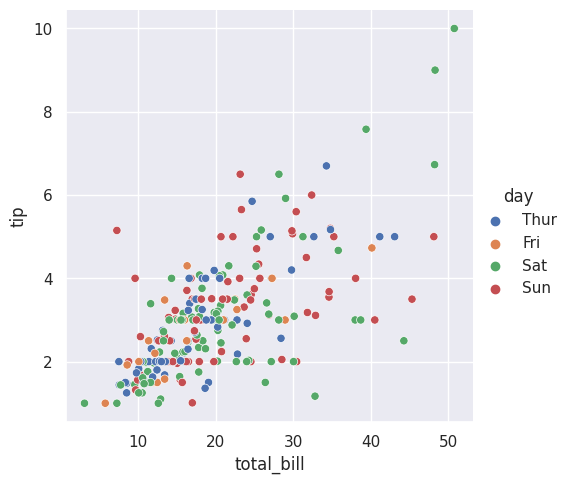

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='day', data=tips)
plt.show()

# 8. jointplot
* scatter, histogram을 동시에 그려줍니다.
* 숫자형 데이터만 표현이 가능하다.

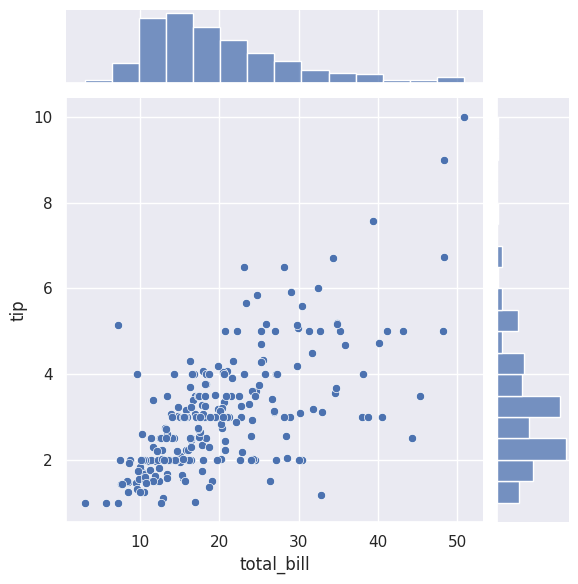

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

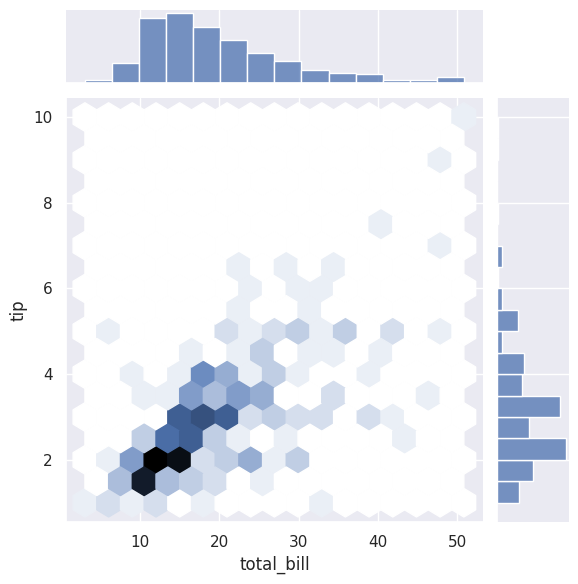

In [ ]:
# hex밀도 설정 가능
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
plt.show()

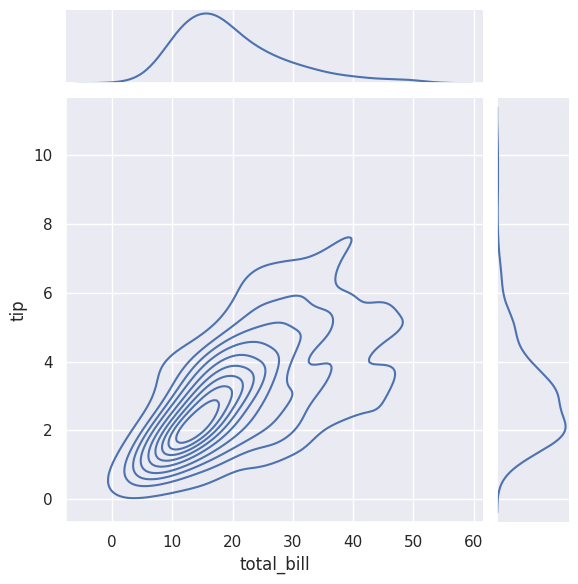

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')
plt.show()